In [12]:
import os
import opsimsummary as oss
import healpy as hp
from opsimsummary import SynOpSim
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
import pickle
from astropy.time import Time

## OpSim database

In [5]:
myopsimv3 = '../data/OpSim_databases/baseline_v3.0_10yrs.db'

In [3]:
import sqlite3
db_name = '../data/baseline_v2.0_10yrs.db'
connection = sqlite3.connect(db_name)
c = connection.cursor()

c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())
print(" ")

c.execute("pragma table_info(Proposal)")
print(c.fetchall())
print(" ")

c.execute("pragma table_info(observations)")
print(c.fetchall())
print(" ")

c.execute("select * from observations limit 1")
print(c.fetchall())
print(" ")
c.execute("select fieldRA from observations limit 10")
print("RA: ")
print(c.fetchall())
print(" ")
c.execute("select fieldDec from observations limit 10")
print("Dec: ")
print(c.fetchall())
print(" ")

c.execute("select proposalId from observations limit 10")
print("ProposalId: ")
print(c.fetchall())
print(" ")

c.execute("select * from Proposal limit 20")
print("Proposal info: ")
print(c.fetchall())
print(" ")

c.execute("select fieldDec from observations")
print("Number of observations: ", len(c.fetchall()))
# 2 million

[('observations',), ('info',), ('Proposal',)]
 
[(0, 'proposalId', 'INT', 0, None, 1), (1, 'proposalName', 'VARCHAR(20)', 0, None, 0), (2, 'proposalType', 'VARCHAR(5)', 0, None, 0)]
 
[(0, 'observationId', 'INTEGER', 0, None, 0), (1, 'fieldRA', 'REAL', 0, None, 0), (2, 'fieldDec', 'REAL', 0, None, 0), (3, 'observationStartMJD', 'REAL', 0, None, 0), (4, 'flush_by_mjd', 'REAL', 0, None, 0), (5, 'visitExposureTime', 'REAL', 0, None, 0), (6, 'filter', 'TEXT', 0, None, 0), (7, 'rotSkyPos', 'REAL', 0, None, 0), (8, 'numExposures', 'INTEGER', 0, None, 0), (9, 'airmass', 'REAL', 0, None, 0), (10, 'seeingFwhm500', 'REAL', 0, None, 0), (11, 'seeingFwhmEff', 'REAL', 0, None, 0), (12, 'seeingFwhmGeom', 'REAL', 0, None, 0), (13, 'skyBrightness', 'REAL', 0, None, 0), (14, 'night', 'INTEGER', 0, None, 0), (15, 'slewTime', 'REAL', 0, None, 0), (16, 'visitTime', 'REAL', 0, None, 0), (17, 'slewDistance', 'REAL', 0, None, 0), (18, 'fiveSigmaDepth', 'REAL', 0, None, 0), (19, 'altitude', 'REAL', 0, None, 0

## OpSim Summary

In [6]:
synopsim = SynOpSim.fromOpSimDB(myopsimv3, opsimversion='fbsv2', usePointingTree=True, use_proposal_table=False,
                               subset='unique_all')

 reading from database sqlite:///../data/OpSim_databases/baseline_v3.0_10yrs.db
We have filterNull set to False
checking that summary table read in

Reading in raw tables successful
replacing names works
dropping duplicates works
dithered column names exists 
Changing units for fbsv2 from degrees


In [7]:
ra = [54.0, 52.0, 89.2, 14.0]
dec = [-27.5, -23.0, -10.5, 46.8]

In [8]:
gen = synopsim.pointingsEnclosing(ra, dec, circRadius=0., pointingRadius=1.75, 
                                  usePointingTree=True)

In [ ]:
next(gen)

In [9]:
obs = next(gen)
obs = obs.sort_values(by=['expMJD'])

check using ptree True


In [ ]:
obs.keys()

In [10]:
lim_mag = obs['fiveSigmaDepth']
filters = obs['filter']
days = obs['expMJD']
psf = obs['seeingFwhmGeom']

print("Observation MJD: ")
print(days)
print(" ")
print("Observation filters:")
print(filters)
print(" ")
print("Limiting magnitude: ")
print(lim_mag)
print(" ")
print("PSF: ")
print(psf)

Observation MJD: 
obsHistID
3570       60222.363772
6705       60226.337841
6706       60226.338258
6707       60226.338674
6708       60226.339091
               ...     
2085796    63869.394606
2085797    63869.394988
2085798    63869.395370
2085799    63869.395752
2085800    63869.396134
Name: expMJD, Length: 23648, dtype: float64
 
Observation filters:
obsHistID
3570       y
6705       g
6706       g
6707       g
6708       g
          ..
2085796    u
2085797    u
2085798    u
2085799    u
2085800    u
Name: filter, Length: 23648, dtype: object
 
Limiting magnitude: 
obsHistID
3570       22.350507
6705       24.690890
6706       24.754717
6707       24.753540
6708       24.868958
             ...    
2085796    22.451458
2085797    22.405750
2085798    22.359770
2085799    22.313539
2085800    22.302807
Name: fiveSigmaDepth, Length: 23648, dtype: float64
 
PSF: 
obsHistID
3570       0.729479
6705       0.819493
6706       0.774801
6707       0.775036
6708       0.701625
           

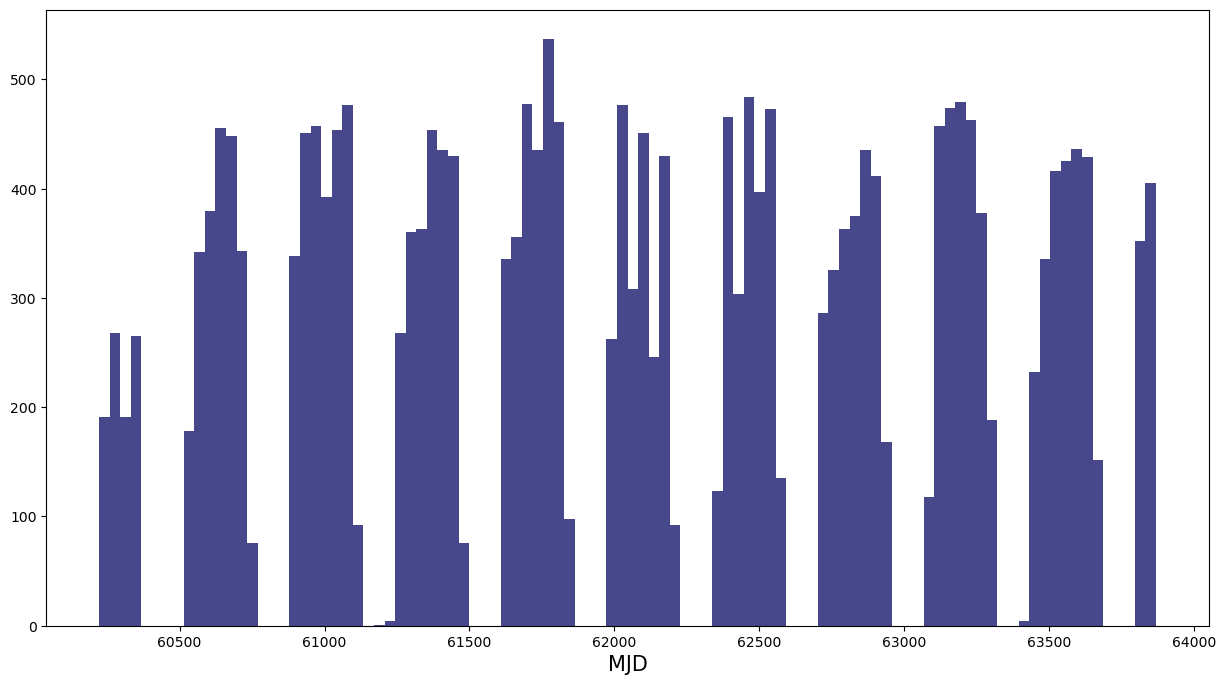

In [11]:



plt.figure(figsize=(15, 8))
plt.hist(days, bins=100, color='midnightblue', alpha=0.8)
plt.xlabel("MJD", fontsize=15)
plt.show()

# dates? close in winter?

## Sample full LSST footprint

In [ ]:
# Input coordinates (DEC between -90 and 40)

def radians(degrees):
    return degrees / 180 * np.pi

N = 30000

# Sample random points on a sphere
ra_points = np.random.uniform(low=-180, high=180, size=N)
dec_points = np.arcsin(2 * np.random.uniform(size=N) - 1) / np.pi * 180

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(radians(ra_points), radians(dec_points), s=1, label="Excluded")

dec_selection = (dec_points > -90) & (dec_points < 40)
ra_points = ra_points[dec_selection]
dec_points = dec_points[dec_selection]
im1 = ax1.scatter(radians(ra_points), radians(dec_points), s=1.5, label="Included")
plt.legend(loc=(0.95, 0.8), fontsize=12)

ra_points += 180

In [ ]:
gen = synopsim.pointingsEnclosing(ra_points, dec_points, circRadius=0., pointingRadius=1.75, 
                                  usePointingTree=True)

In [ ]:
# Loop through all pointings and save the ones that are in the LSST footprint

opsim_ra_list, opsim_dec_list = [], []

for p in range(len(ra_points)):
    
    obs = next(gen)
    
    opsim_ra = np.mean(obs['fieldRA'])
    opsim_dec = np.mean(obs['fieldDec'])

    if np.isnan(opsim_ra) or np.isnan(opsim_dec):
        continue
    
    opsim_ra_list.append(opsim_ra)
    opsim_dec_list.append(opsim_dec)
    
opsim_ra_list = np.array(opsim_ra_list)
opsim_dec_list = np.array(opsim_dec_list)
opsim_ra_list -= 180

In [ ]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(radians(opsim_ra_list), radians(opsim_dec_list), s=0.5)